# HDBSCAN on handwritten digits

HDBSCAN is a clustering algorithm developed by [Campello, Moulavi, and Sander](http://link.springer.com/chapter/10.1007%2F978-3-642-37456-2_14). It extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters.

Before we get started we'll load up most of the libraries we'll need in the background, and set up our plotting.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}

In [2]:
# Load the data
digits = load_digits()

#Standardize the dataset along any axis
#Center to the mean and component wise scale to unit variance.
data = scale(digits.data)

In [3]:
n_samples, n_features = data.shape
print(n_samples, n_features)

1797 64


In [4]:
labels = digits.target
n_digits = len(np.unique(labels))
n_digits

10

In [5]:
# Reduce the data using PCA
reduced_data = PCA(n_components=2).fit_transform(data)

In [6]:
reduced_data.shape

(1797, 2)

After reducing our original data dimensions from 64 to 2, let's plot the two prinpical components.

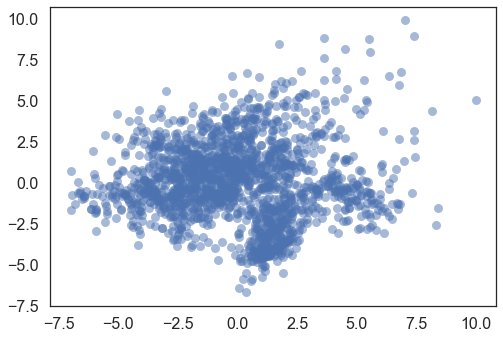

In [7]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], color='b', **plot_kwds)
plt.show()

So let's load up the [hdbscan library](https://github.com/scikit-learn-contrib/hdbscan) and get to work.

In [8]:
import hdbscan

In [9]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=14, gen_min_span_tree=True)
clusterer.fit(reduced_data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=True, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=14, min_samples=None, p=None,
    prediction_data=False)

## What actually happened?

We can break it out into a series of of steps:
- Transform the space according to the density/sparsity.
- Build the minimum spanning tree of the distance weighted graph.
- Construct a cluster hierarchy of connected components.
- Condense the cluster hierarchy based on minimum cluster size.
- Extract the stable clusters from the condensed tree.

### Build the minimum spanning tree of the distance weighted graph

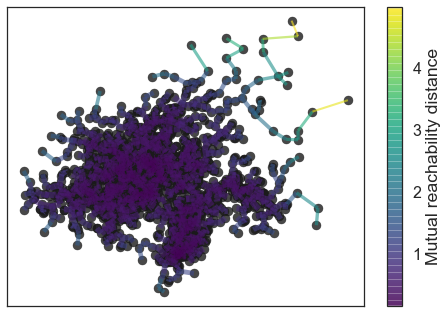

In [10]:
clusterer.minimum_spanning_tree_.plot(
    edge_cmap='viridis', edge_alpha=0.6, node_size=80, edge_linewidth=2)

### Construct the cluster hierarchy

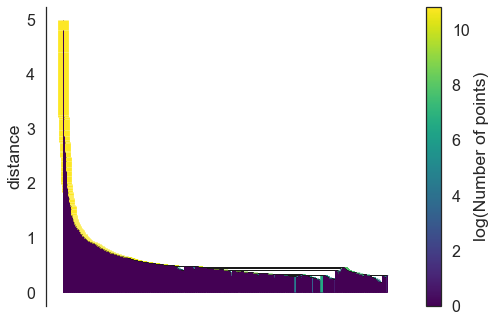

In [11]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

### Condense the cluster tree

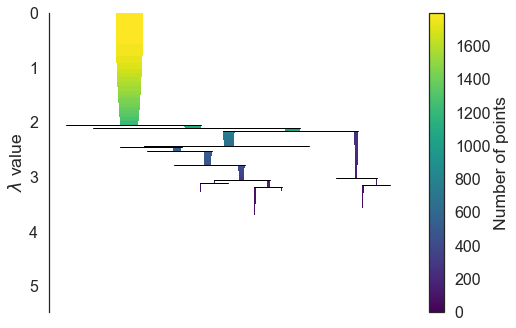

In [12]:
clusterer.condensed_tree_.plot()

This is much easier to look at and deal with, particularly in as simple a clustering problem as our current test dataset. However we still need to pick out clusters to use as a flat clustering. Looking at the plot above should give you some ideas about how one might go about doing this.

### Extract the clusters

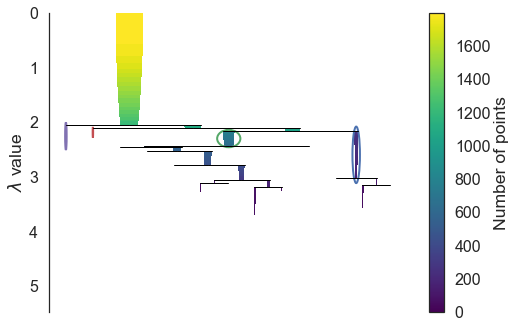

In [13]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

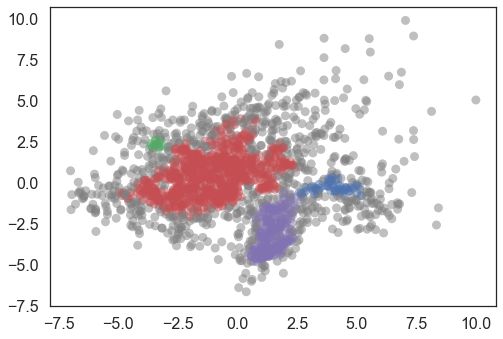

In [14]:
palette = sns.color_palette()
cluster_colors = [
    sns.desaturate(palette[col], sat) if col >= 0 else (0.5, 0.5, 0.5)
    for col, sat in zip(clusterer.labels_, clusterer.probabilities_)
]
plt.scatter(
    reduced_data[:, 0], reduced_data[:, 1], c=cluster_colors, **plot_kwds)

In [15]:
%load_ext version_information
%version_information sklearn, seaborn, hdbscan, matplotlib

Software versions
Python 3.6.3 64bit [MSC v.1900 64 bit (AMD64)]
IPython 6.2.1
OS Windows 10 10.0.16299 SP0
sklearn 0.19.1
seaborn 0.8.1
hdbscan 0.8.11
matplotlib 2.1.1
Fri Jan 19 14:55:00 2018 Central Standard Time